In [6]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [7]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [8]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

In [9]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=1.03904539678018, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [10]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [11]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [15]:
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [16]:
import matplotlib.pyplot as plt
from itertools import cycle

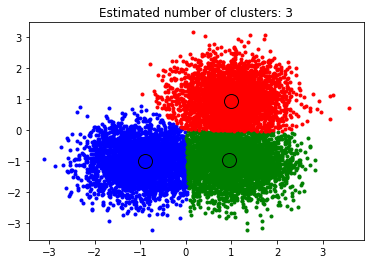

In [19]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
  my_members = labels == k
  cluster_center = cluster_centers[k]
  plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
  plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
           markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()